# Movie Lens Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the Ratings file and store it in a dataframe

ratings = pd.read_table(r'D:/Data_Science_Data/Movie Data/ratings.dat',sep = '::',names=['userid','movieid','rating','timestamp'])

In [4]:
# Read the Users file and store it in a dataframe

users = pd.read_table(r'D:/Data_Science_Data/Movie Data/users.dat',sep = '::',names=['userid','gender','age','occupation','zipcode'])

In [6]:
# Read the Movies file and store it in a dataframe

movies = pd.read_table(r'D:/Data_Science_Data/Movie Data\movies.dat',sep = '::',names=['movieid','title','genre'])


In [7]:
ratings.head()

,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
users.head()

,userid,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [9]:
movies.head()

,movieid,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
#Removing the year from the title in the movies file, so that we just retrieve the movie name.
#store it in a new column in the 'movies' dataframe. This will make our data manipulations easier.

movies['title_only'] = movies.title.str[:-7]
movies['title_only']

0                         Toy Story
1                           Jumanji
2                  Grumpier Old Men
3                 Waiting to Exhale
4       Father of the Bride Part II
                   ...             
3878               Meet the Parents
3879            Requiem for a Dream
3880                      Tigerland
3881               Two Family House
3882                 Contender, The
Name: title_only, Length: 3883, dtype: object

# Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating.

# (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [12]:
tempDataset = pd.merge(ratings,movies,on='movieid')
tempDataset.head()

,userid,movieid,rating,timestamp,title,genre,title_only
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest


In [16]:
final_df = pd.merge(tempDataset, users, on='userid')
final_df.head()

,userid,movieid,rating,timestamp,title,genre,title_only,gender,age,occupation,zipcode
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,James and the Giant Peach,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,My Fair Lady,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,Erin Brockovich,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,"Bug's Life, A",F,1,10,48067


In [17]:
# Check if the dataset has any null values
final_df.isnull().sum()

userid        0
movieid       0
rating        0
timestamp     0
title         0
genre         0
title_only    0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64

# Creating the final dataset [Master_Data] with the following columns only: MovieID Title UserID Age Gender Occupation Rating

In [ ]:
# To create master data 

In [18]:
master_data = final_df[['movieid','title_only','rating','genre','userid','age','gender','occupation']]

In [19]:
master_data.head()

,movieid,title_only,rating,genre,userid,age,gender,occupation
0,1193,One Flew Over the Cuckoo's Nest,5,Drama,1,1,F,10
1,661,James and the Giant Peach,3,Animation|Children's|Musical,1,1,F,10
2,914,My Fair Lady,3,Musical|Romance,1,1,F,10
3,3408,Erin Brockovich,4,Drama,1,1,F,10
4,2355,"Bug's Life, A",5,Animation|Children's|Comedy,1,1,F,10


In [20]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   userid      1000209 non-null  int64 
 1   movieid     1000209 non-null  int64 
 2   rating      1000209 non-null  int64 
 3   timestamp   1000209 non-null  int64 
 4   title       1000209 non-null  object
 5   genre       1000209 non-null  object
 6   title_only  1000209 non-null  object
 7   gender      1000209 non-null  object
 8   age         1000209 non-null  int64 
 9   occupation  1000209 non-null  int64 
 10  zipcode     1000209 non-null  object
dtypes: int64(6), object(5)
memory usage: 91.6+ MB


# Explore the datasets using visual representations (graphs or tables), also include your comments on the following:

# 1. User Age Distribution

Text(0.5, 1.0, 'Age Distribution of the Users')

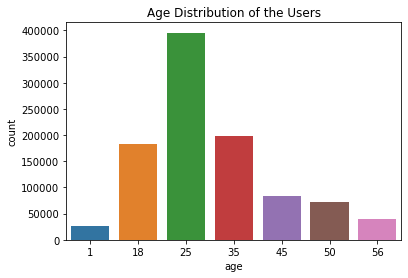

In [21]:
#Plot the Age distribution of the users

sns.countplot(x='age',data = final_df).set_title('Age Distribution of the Users')

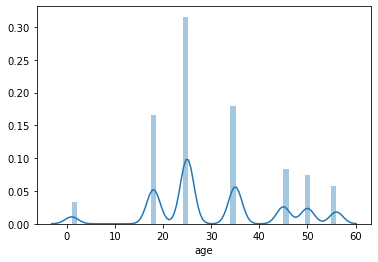

In [49]:
#User Age Distribution

sns.distplot(users.age)

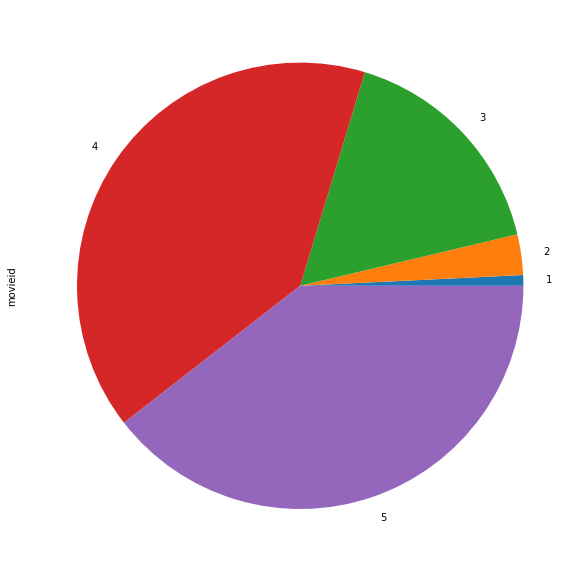

In [50]:
#finalDF[finalDF.Title == 'Toy Story (1995)'].groupby('Rating')['MovieID'].count().plot(kind="pie")

x=final_df[final_df.title_only == 'Toy Story'].groupby('rating')['movieid'].count()
x.plot(kind="pie",figsize=(10,15))

In [23]:
#Subset the dataset where the title of the movie = 'Toy Story'
toy_story = final_df[final_df['title_only']=='Toy Story']
toy_story

,userid,movieid,rating,timestamp,title,genre,title_only,gender,age,occupation,zipcode
40,1,1,5,978824268,Toy Story (1995),Animation|Children's|Comedy,Toy Story,F,1,10,48067
634,18,1,4,978154768,Toy Story (1995),Animation|Children's|Comedy,Toy Story,F,18,3,95825
938,19,1,5,978555994,Toy Story (1995),Animation|Children's|Comedy,Toy Story,M,1,10,48073
1323,28,1,3,978985309,Toy Story (1995),Animation|Children's|Comedy,Toy Story,F,25,1,14607
2118,44,1,5,978019369,Toy Story (1995),Animation|Children's|Comedy,Toy Story,M,45,17,98052
...,...,...,...,...,...,...,...,...,...,...,...
986597,761,1,4,975451381,Toy Story (1995),Animation|Children's|Comedy,Toy Story,M,18,7,99945
986617,1672,1,4,974709664,Toy Story (1995),Animation|Children's|Comedy,Toy Story,M,25,17,93933
986656,4242,1,4,965312337,Toy Story (1995),Animation|Children's|Comedy,Toy Story,M,50,7,78704
986787,4925,1,5,962663249,Toy Story (1995),Animation|Children's|Comedy,Toy Story,F,35,6,55401


Text(0.5, 1.0, 'Movie Ratings for Toy Story')

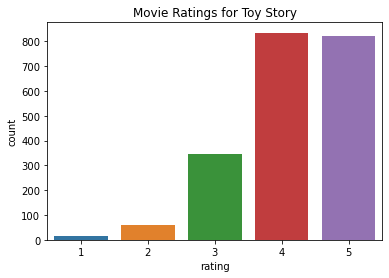

In [24]:
# Plot the ratings for the movie 'Toy Story'

sns.countplot(x='rating',data = toy_story).set_title('Movie Ratings for Toy Story')

# 3. Top 25 movies by viewership ratings
# This means we need to get top 25 movies which got the maximumnumber of ratings.

. sort the data according to the ratings

. extract the movie ID and title from the data

. drop duplicates

. extract the title of top 25 mov

In [25]:
top_25 = final_df.groupby('title_only').size().sort_values(ascending=False)[:25]
top_25

title_only
American Beauty                                   3428
Star Wars: Episode IV - A New Hope                2991
Star Wars: Episode V - The Empire Strikes Back    2990
Star Wars: Episode VI - Return of the Jedi        2883
Jurassic Park                                     2672
Saving Private Ryan                               2653
Terminator 2: Judgment Day                        2649
Matrix, The                                       2590
Back to the Future                                2583
Silence of the Lambs, The                         2578
Men in Black                                      2538
Raiders of the Lost Ark                           2514
Fargo                                             2513
Sixth Sense, The                                  2459
Braveheart                                        2443
Shakespeare in Love                               2369
Princess Bride, The                               2318
Schindler's List                                  2304

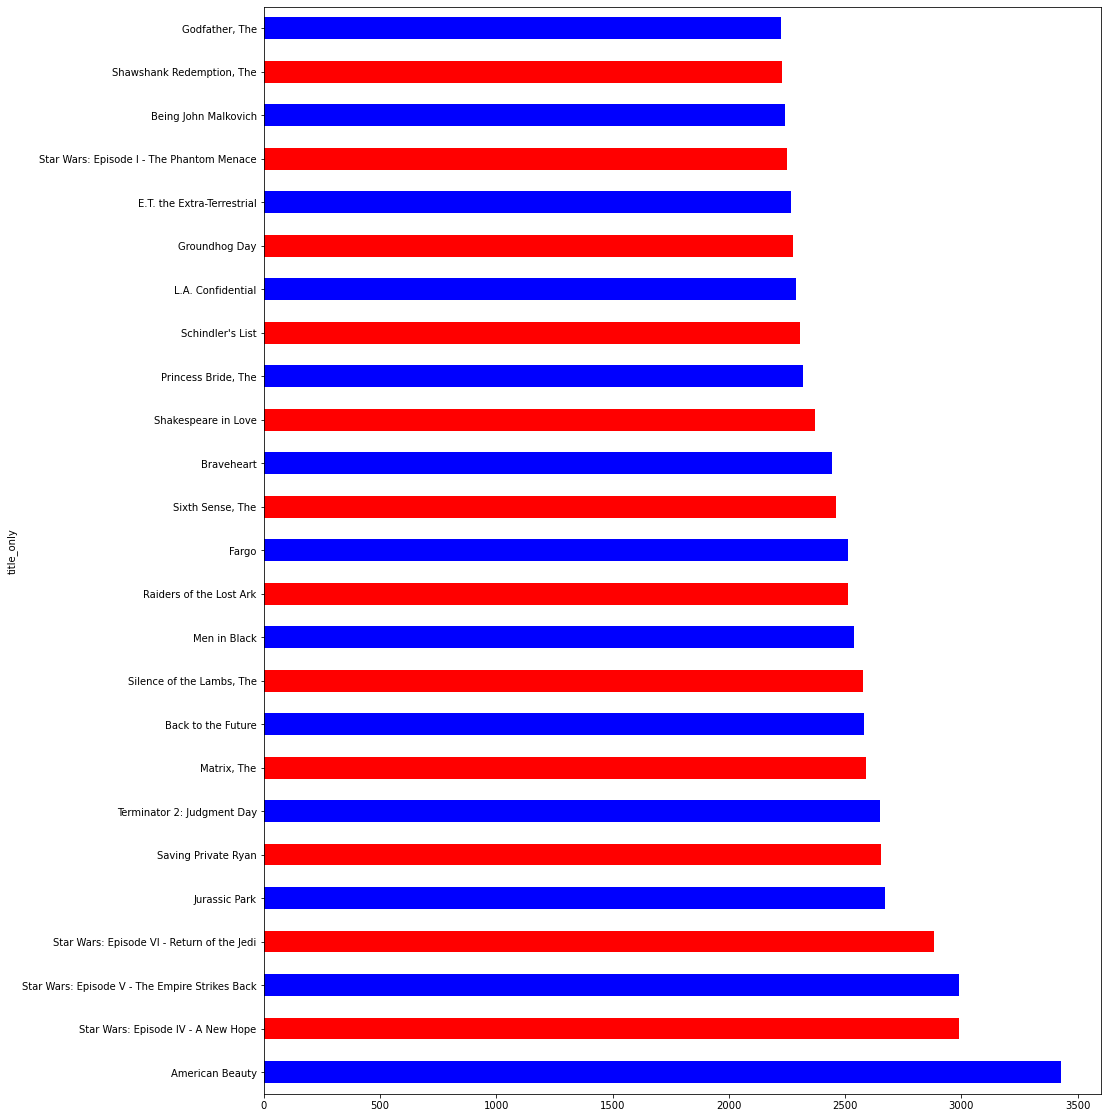

In [53]:
#Plotting the top 25 movies which received the maximum ratings
top_25.plot(kind='barh',color=list('br'),alpha=1,figsize=(15,20))

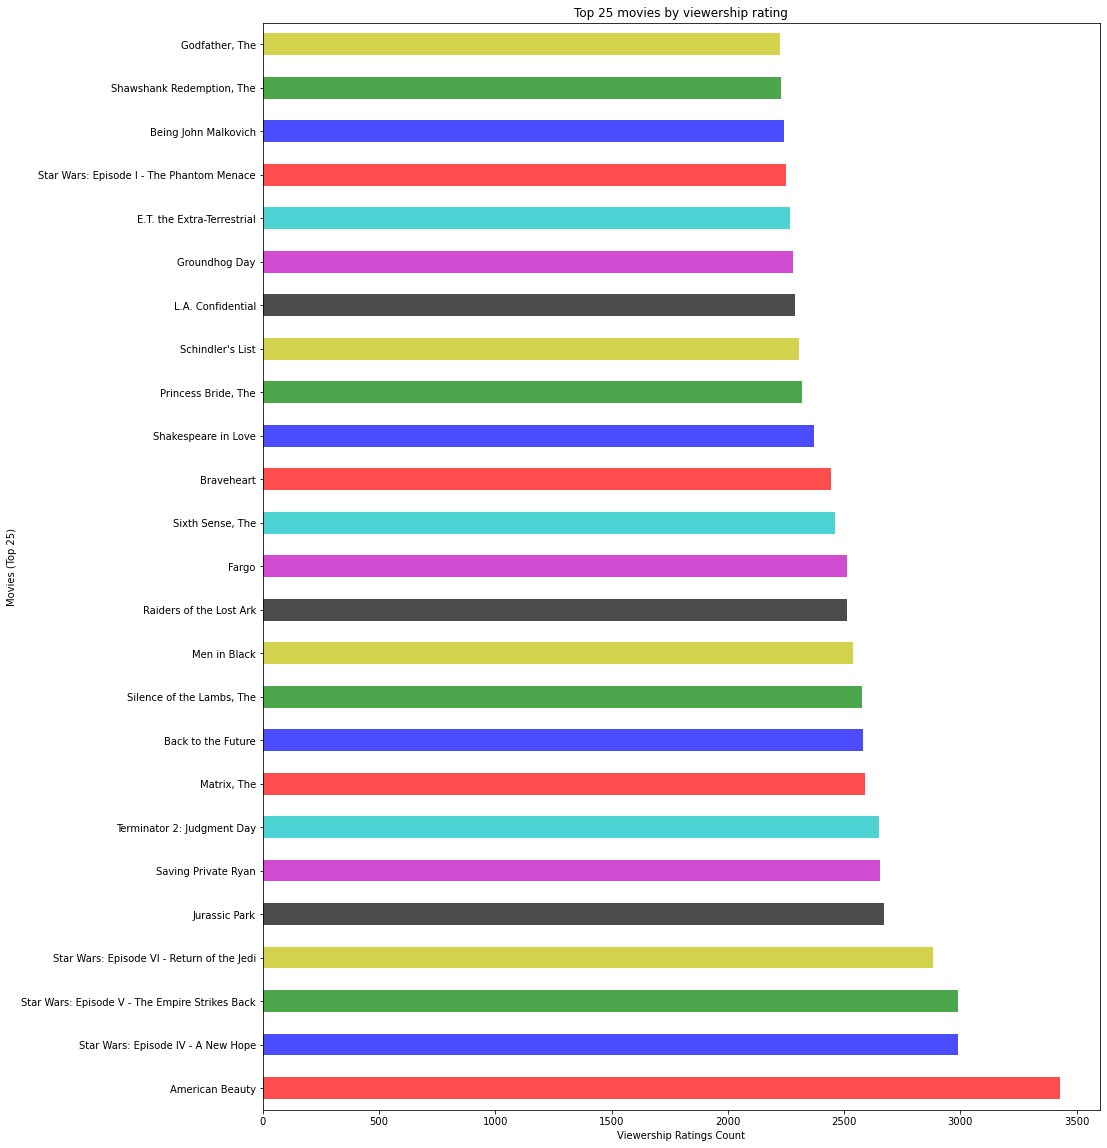

In [38]:
top_25.plot(kind='barh', color=list('rbgykmc'), alpha=0.7, figsize=(15,20),stacked=False) 
plt.xlabel("Viewership Ratings Count")
plt.ylabel("Movies (Top 25)")
plt.title("Top 25 movies by viewership rating") 
plt.show()

# 4. Find the ratings for all the movies reviewed by user id = 2696


In [30]:
# Subset the dataset wehere the UserId = 2696.

user_2696 = final_df[final_df['userid']==2696]
user_2696

,userid,movieid,rating,timestamp,title,genre,title_only,gender,age,occupation,zipcode
953847,2696,1270,2,973308676,Back to the Future (1985),Comedy|Sci-Fi,Back to the Future,M,25,7,24210
953848,2696,1097,3,973308690,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,E.T. the Extra-Terrestrial,M,25,7,24210
953849,2696,1617,4,973308842,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,L.A. Confidential,M,25,7,24210
953850,2696,800,5,973308842,Lone Star (1996),Drama|Mystery,Lone Star,M,25,7,24210
953851,2696,3386,1,973308842,JFK (1991),Drama|Mystery,JFK,M,25,7,24210
953852,2696,3176,4,973308865,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller,"Talented Mr. Ripley, The",M,25,7,24210
953853,2696,1711,4,973308904,Midnight in the Garden of Good and Evil (1997),Comedy|Crime|Drama|Mystery,Midnight in the Garden of Good and Evil,M,25,7,24210
953854,2696,1589,3,973308865,Cop Land (1997),Crime|Drama|Mystery,Cop Land,M,25,7,24210
953855,2696,1783,4,973308865,Palmetto (1998),Film-Noir|Mystery|Thriller,Palmetto,M,25,7,24210
953856,2696,1892,4,973308904,"Perfect Murder, A (1998)",Mystery|Thriller,"Perfect Murder, A",M,25,7,24210


Text(0.5, 1.0, 'Ratings for movies by user 2696')

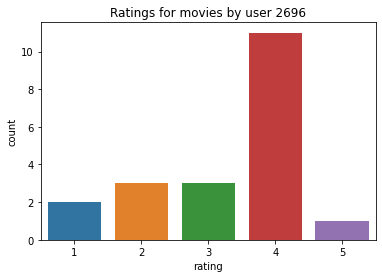

In [60]:
# Plotting the ratings given by the user 2696

sns.countplot(x='rating',data = user_2696).set_title('Ratings for movies by user 2696')

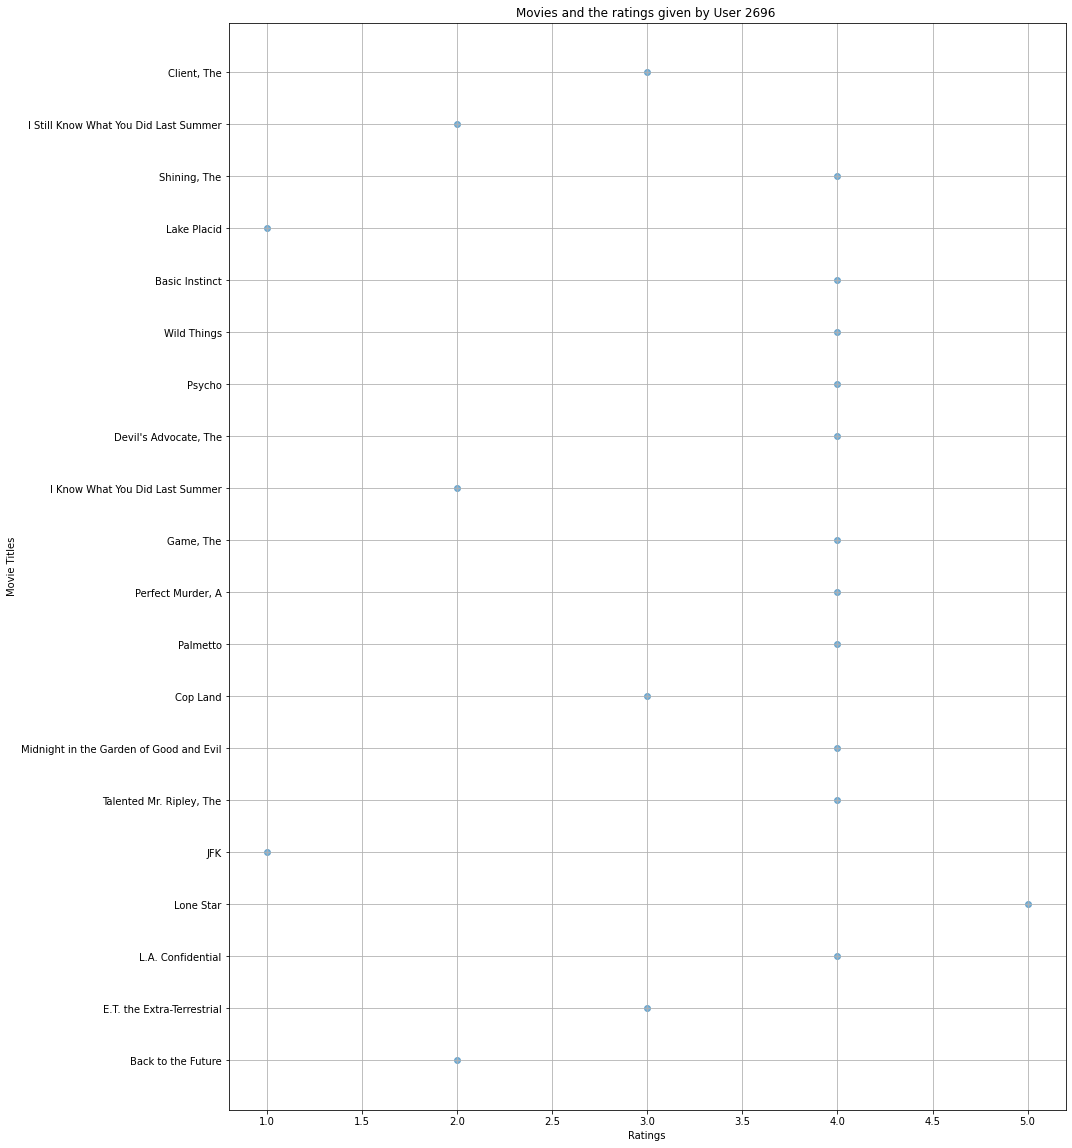

In [39]:
# Creating a scatter plot for the movies reviewed by the user 2696.

plt.figure(figsize=(15,20))
plt.scatter(user_2696.rating,user_2696.title_only, alpha=.55)
plt.title("Movies and the ratings given by User 2696 ")
plt.ylabel("Movie Titles")
plt.xlabel("Ratings")
plt.grid(b=True,which='major')
plt.show()

# Feature Engineering:
    
# Use column genres:
    
# 1. Find out all the unique genres (Hint: split the data in column genre making # a list and then process the data to find out only the unique categories of genres)

In [33]:
final_df.head()

,userid,movieid,rating,timestamp,title,genre,title_only,gender,age,occupation,zipcode
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,James and the Giant Peach,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,My Fair Lady,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,Erin Brockovich,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,"Bug's Life, A",F,1,10,48067


# Find out all the unique genres

In [61]:
df_genre = pd.DataFrame(final_df['genre'].value_counts())
df_genre

,genre
Comedy,116883
Drama,111423
Comedy|Romance,42712
Comedy|Drama,42245
Drama|Romance,29170
...,...
Drama|Romance|Western,29
Children's|Fantasy,27
Comedy|Film-Noir|Thriller,5
Film-Noir|Horror,2


# Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.
          
# One hot encoding

In [62]:
# using LabelEncoder categorical to numerical 

from sklearn.preprocessing import LabelEncoder
gle=LabelEncoder()

In [57]:
genre_labels = gle.fit_transform(final_df['genre'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
genre_mappings

{0: 'Action',
 1: 'Action|Adventure',
 2: 'Action|Adventure|Animation',
 3: "Action|Adventure|Animation|Children's|Fantasy",
 4: 'Action|Adventure|Animation|Horror|Sci-Fi',
 5: "Action|Adventure|Children's",
 6: "Action|Adventure|Children's|Comedy",
 7: "Action|Adventure|Children's|Fantasy",
 8: "Action|Adventure|Children's|Sci-Fi",
 9: 'Action|Adventure|Comedy',
 10: 'Action|Adventure|Comedy|Crime',
 11: 'Action|Adventure|Comedy|Horror',
 12: 'Action|Adventure|Comedy|Horror|Sci-Fi',
 13: 'Action|Adventure|Comedy|Romance',
 14: 'Action|Adventure|Comedy|Sci-Fi',
 15: 'Action|Adventure|Comedy|War',
 16: 'Action|Adventure|Crime',
 17: 'Action|Adventure|Crime|Drama',
 18: 'Action|Adventure|Crime|Thriller',
 19: 'Action|Adventure|Drama',
 20: 'Action|Adventure|Drama|Romance',
 21: 'Action|Adventure|Drama|Sci-Fi|War',
 22: 'Action|Adventure|Drama|Thriller',
 23: 'Action|Adventure|Fantasy',
 24: 'Action|Adventure|Fantasy|Sci-Fi',
 25: 'Action|Adventure|Horror',
 26: 'Action|Adventure|Horror|T

In [63]:
final_df['labels']= genre_labels

In [64]:
final_df.head()

,userid,movieid,rating,timestamp,title,genre,title_only,gender,age,occupation,zipcode,labels
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest,F,1,10,48067,239
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,James and the Giant Peach,F,1,10,48067,152
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,My Fair Lady,F,1,10,48067,282
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,Erin Brockovich,F,1,10,48067,239
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,"Bug's Life, A",F,1,10,48067,145


In [66]:
final_df.shape

(1000209, 12)

# We need to do classification problem as rating is not continuous,it is categorical

# Target column is

In [70]:
genre_all=[]

#The Genre column from the final_df is stored in 'val'

val = final_df.genre

# Run a for loop for every genre read in 'val and split it "|" and store it in temp. Then keep adding all the split genre in "genre_all".

for i in val:
    temp = i.split("|")
    genre_all.extend(temp)

In [71]:
# Since genre_all contains duplicates of genre values, we need to create a unique list of genres.

unique_genre = list(set(genre_all))
unique_genre

['Western',
 'Crime',
 'Film-Noir',
 'Romance',
 'Thriller',
 'Comedy',
 'Mystery',
 'Adventure',
 'Animation',
 'Horror',
 'Fantasy',
 'Musical',
 'Drama',
 'War',
 'Action',
 'Sci-Fi',
 "Children's",
 'Documentary']

In [75]:
#now that we have split the genres and created a unique list of the same, run a for loop for every record in final_df.

# check if the unique genre exists in the 'genre' field, if it does, then a '1' will be written in that column else '0'

# This was 18 columns will be added in the dataset for the 18 genres.

for i in unique_genre:
    final_df[i] = final_df['genre'].str.contains(i)*1

In [76]:
# Print the dataset with the genre columns and values.

final_df.tail()

,userid,movieid,rating,timestamp,title,genre,title_only,gender,age,occupation,...,Animation,Horror,Fantasy,Musical,Drama,War,Action,Sci-Fi,Children's,Documentary
1000204,4211,3791,2,965319075,Footloose (1984),Drama,Footloose,M,45,5,...,0,0,0,0,1,0,0,0,0,0
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),Western,MacKenna's Gold,M,45,5,...,0,0,0,0,0,0,0,0,0,0
1000206,4211,3840,4,965319197,Pumpkinhead (1988),Horror,Pumpkinhead,M,45,5,...,0,1,0,0,0,0,0,0,0,0
1000207,4211,3766,2,965319138,Missing in Action (1984),Action|War,Missing in Action,M,45,5,...,0,0,0,0,0,1,1,0,0,0
1000208,4211,3834,2,965318885,Bronco Billy (1980),Adventure|Drama|Romance,Bronco Billy,M,45,5,...,0,0,0,0,1,0,0,0,0,0


In [77]:
# Check to see the 18 columns added in the dataset for each genre.

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 30 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   userid       1000209 non-null  int64 
 1   movieid      1000209 non-null  int64 
 2   rating       1000209 non-null  int64 
 3   timestamp    1000209 non-null  int64 
 4   title        1000209 non-null  object
 5   genre        1000209 non-null  object
 6   title_only   1000209 non-null  object
 7   gender       1000209 non-null  object
 8   age          1000209 non-null  int64 
 9   occupation   1000209 non-null  int64 
 10  zipcode      1000209 non-null  object
 11  labels       1000209 non-null  int32 
 12  Western      1000209 non-null  int32 
 13  Crime        1000209 non-null  int32 
 14  Film-Noir    1000209 non-null  int32 
 15  Romance      1000209 non-null  int32 
 16  Thriller     1000209 non-null  int32 
 17  Comedy       1000209 non-null  int32 
 18  Mystery      1000209 n

In [78]:
#Determine the features affecting the ratings of any particular movie.
#
# Hint: Perform Chi-sqaure test between Xfeature v/s ratings ---- To do feature elimination
#
# and finalize your feature
#
# final numpy array called 'feature'

In [80]:
from scipy.stats import chi2_contingency

ct_title = pd.crosstab(final_df.title,final_df.rating)

ct_gender = pd.crosstab(final_df.gender,final_df.rating)

ct_age = pd.crosstab(final_df.age,final_df.rating)

ct_occupation = pd.crosstab(final_df.occupation,final_df.rating)

ct_zipCode = pd.crosstab(final_df['zipcode'],final_df.rating)

In [83]:
from scipy.stats import chi2_contingency

list1 = [ct_title,ct_gender,ct_age,ct_occupation,ct_zipCode]

for i in list1:
    
    stat,pvalue,dof,expected_R = chi2_contingency(i)
    if pvalue <= 0.05:
        print("Alternate Hypothesis passed. {} and Rating have Relationship".format(i.index.name))
    else:
        print("Null hypothesis passed. {} and Profit doesnot have Relationship".format(i.index.name))

Alternate Hypothesis passed. title and Rating have Relationship
Alternate Hypothesis passed. gender and Rating have Relationship
Alternate Hypothesis passed. age and Rating have Relationship
Alternate Hypothesis passed. occupation and Rating have Relationship
Alternate Hypothesis passed. zipcode and Rating have Relationship


# Prediction modelling

In [85]:
final_df[:5]

,userid,movieid,rating,timestamp,title,genre,title_only,gender,age,occupation,...,Animation,Horror,Fantasy,Musical,Drama,War,Action,Sci-Fi,Children's,Documentary
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest,F,1,10,...,0,0,0,0,1,0,0,0,0,0
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,James and the Giant Peach,F,1,10,...,1,0,0,1,0,0,0,0,1,0
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,My Fair Lady,F,1,10,...,0,0,0,1,0,0,0,0,0,0
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,Erin Brockovich,F,1,10,...,0,0,0,0,1,0,0,0,0,0
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,"Bug's Life, A",F,1,10,...,1,0,0,0,0,0,0,0,1,0


In [86]:
# Develop an appropriate model to predict the movie ratings
# using above found feature numpy array and rating as label

features = final_df.iloc[:,[1,7,8,9]]
label = final_df.rating

In [87]:
features.head()

,movieid,gender,age,occupation
0,1193,F,1,10
1,661,F,1,10
2,914,F,1,10
3,3408,F,1,10
4,2355,F,1,10


In [88]:
label.head()

0    5
1    3
2    3
3    4
4    5
Name: rating, dtype: int64

In [89]:
from sklearn.preprocessing import LabelEncoder

stateLabelEncoder = LabelEncoder()

features.iloc[:,0] = stateLabelEncoder.fit_transform(features.iloc[:,0])
features.iloc[:,1] = stateLabelEncoder.fit_transform(features.iloc[:,1])

In [90]:
features.head()

,movieid,gender,age,occupation
0,1104,0,1,10
1,639,0,1,10
2,853,0,1,10
3,3177,0,1,10
4,2162,0,1,10


In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                 label,
                                                 test_size=0.2,
                                                 random_state = 1)

In [92]:
# K Nearest Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train,y_train)
knn_predictions = knn_model.predict(X_test)
acc_knn = round(knn_model.score(X_train,y_train) * 100, 2)

In [93]:
# creating a confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_predictions)

In [94]:
knn_predictions

array([5, 5, 4, ..., 1, 1, 3], dtype=int64)

In [95]:
cm

array([[ 3021,  2560,  2962,  1979,   708],
       [ 3773,  4659,  6466,  4901,  1681],
       [ 5861,  9404, 16237, 14733,  5964],
       [ 5190,  9688, 20280, 22353, 12206],
       [ 2402,  4719, 11112, 13939, 13244]], dtype=int64)

In [96]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train,y_train) * 100, 2)
acc_decision_tree

59.77

In [97]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train,y_train)
acc_random_forest = round(random_forest.score(X_train,y_train) * 100, 2)
acc_random_forest

59.77